In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

we handle missing values, values which are of string type but in number all these values

In [44]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [57]:
type(df.size[0])

IndexError: invalid index to scalar variable.

In [45]:
df1 = df.drop(['area_type', 'availability', 'society'], axis =1)

In [46]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [47]:
df2 = df1.dropna()

In [48]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [49]:
df2.shape[0]

12710

In [50]:
df2['balcony'].unique()

array([1., 3., 2., 0.])

In [51]:
df2['balcony'] = df2['balcony'].apply(lambda x : int(x))

C:\Users\nitis\AppData\Local\Temp\ipykernel_20284\4112102623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['balcony'] = df2['balcony'].apply(lambda x : int(x))


In [52]:
type(df2.location[0])

str

In [53]:
type(df2.bath[0])

numpy.float64

In [54]:
type(df2.size)

numpy.int32

In [55]:
df2.describe()

,bath,balcony,price
count,12710.000000,12710.000000,12710.000000
mean,2.617309,1.584343,106.060778
std,1.226000,0.817287,131.766089
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.030000
50%,2.000000,2.000000,70.000000
75%,3.000000,2.000000,115.000000
max,40.000000,3.000000,2912.000000


In [12]:
df2['bath'] = df2['bath'].apply(lambda x : int(x))

C:\Users\nitis\AppData\Local\Temp\ipykernel_20284\3393923491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bath'] = df2['bath'].apply(lambda x : int(x))


In [13]:
type(df2.bath[0])

numpy.int64

In [14]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price
30,Yelahanka,4 BHK,2100 - 2850,4,0,186.000
122,Hebbal,4 BHK,3067 - 8156,4,0,477.000
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2,0,54.005
165,Sarjapur,2 BHK,1145 - 1340,2,0,43.490
188,KR Puram,2 BHK,1015 - 1540,2,0,56.800
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2,0,38.190
12990,Talaghattapura,3 BHK,1804 - 2273,3,0,122.000
13059,Harlur,2 BHK,1200 - 1470,2,0,72.760
13265,Hoodi,2 BHK,1133 - 1384,2,0,59.135


In [17]:
def convert_s(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_s)
df2

C:\Users\nitis\AppData\Local\Temp\ipykernel_20284\1800894481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft'] = df2['total_sqft'].apply(convert_s)


,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056.0,2,1,39.07
1,Chikka Tirupathi,4 Bedroom,2600.0,5,3,120.00
2,Uttarahalli,3 BHK,1440.0,2,3,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3,1,95.00
4,Kothanur,2 BHK,1200.0,2,1,51.00
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3,3,112.00
13315,Whitefield,5 Bedroom,3453.0,4,0,231.00
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2,1,60.00
13318,Padmanabhanagar,4 BHK,4689.0,4,1,488.00


In [19]:
df2.describe()

,total_sqft,bath,balcony,price
count,12668.000000,12710.000000,12710.000000,12710.000000
mean,1511.835167,2.617309,1.584343,106.060778
std,1162.097276,1.226000,0.817287,131.766089
min,5.000000,1.000000,0.000000,8.000000
25%,1100.000000,2.000000,1.000000,49.030000
50%,1260.000000,2.000000,2.000000,70.000000
75%,1640.000000,3.000000,2.000000,115.000000
max,52272.000000,40.000000,3.000000,2912.000000


In [96]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [97]:
df2['bhk'] = df2['size'].apply(lambda x : x.split(' ')[0])

C:\Users\nitis\AppData\Local\Temp\ipykernel_2400\4236887448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x : x.split(' ')[0])


In [98]:
df2 = df2.drop(['size'], axis = 1)
df2

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2,1,39.07,2
1,Chikka Tirupathi,2600.0,5,3,120.00,4
2,Uttarahalli,1440.0,2,3,62.00,3
3,Lingadheeranahalli,1521.0,3,1,95.00,3
4,Kothanur,1200.0,2,1,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3,3,112.00,3
13315,Whitefield,3453.0,4,0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2,1,60.00,2
13318,Padmanabhanagar,4689.0,4,1,488.00,4


In [99]:
df2['bhk'].unique()

array(['2', '4', '3', '1', '6', '8', '7', '5', '11', '9', '27', '43',
       '14', '12', '10', '13'], dtype=object)

In [100]:
df2.isnull().sum()

location       0
total_sqft    42
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [101]:
df2 = df2.dropna()

In [102]:
df2.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
singapura paradise      1
t.c palya               1
tc.palya                4
vinayakanagar           1
whitefiled              1
Name: location, Length: 1259, dtype: int64

now we find out price per sqft and handle the location column as it can have many unique values try to sort or reduce them

In [103]:
df2

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2,1,39.07,2
1,Chikka Tirupathi,2600.0,5,3,120.00,4
2,Uttarahalli,1440.0,2,3,62.00,3
3,Lingadheeranahalli,1521.0,3,1,95.00,3
4,Kothanur,1200.0,2,1,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3,3,112.00,3
13315,Whitefield,3453.0,4,0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2,1,60.00,2
13318,Padmanabhanagar,4689.0,4,1,488.00,4


In [104]:
df2['price_per_sqft'] = df2['price']*100000/df2['total_sqft']
df2

C:\Users\nitis\AppData\Local\Temp\ipykernel_2400\3447956445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price_per_sqft'] = df2['price']*100000/df2['total_sqft']


,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,1,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5,3,120.00,4,4615.384615
2,Uttarahalli,1440.0,2,3,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,1,95.00,3,6245.890861
4,Kothanur,1200.0,2,1,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3,3,112.00,3,6530.612245
13315,Whitefield,3453.0,4,0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2,1,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4,1,488.00,4,10407.336319


In [105]:
df2['price_per_sqft'].describe()

count    1.266800e+04
mean     6.876277e+03
std      2.263354e+04
min      2.678298e+02
25%      4.242721e+03
50%      5.376344e+03
75%      7.142857e+03
max      2.300000e+06
Name: price_per_sqft, dtype: float64

In [106]:
len(df2.location.unique())

1259

In [107]:
df2['location'] = df2['location'].apply(lambda x : x.strip())

C:\Users\nitis\AppData\Local\Temp\ipykernel_2400\1742642066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location'] = df2['location'].apply(lambda x : x.strip())


In [108]:
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield              514
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          259
Thanisandra             233
                       ... 
1 Giri Nagar              1
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
whitefiled                1
Name: location, Length: 1248, dtype: int64

In [109]:
len(location_stats[location_stats<=10])

1013

In [110]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Nagappa Reddy Layout    10
Thyagaraja Nagar        10
Ganga Nagar             10
Naganathapura           10
Dairy Circle            10
                        ..
1 Giri Nagar             1
Kanakapura  Rod          1
Kanakapura Main Road     1
Kanakapura Road          1
whitefiled               1
Name: location, Length: 1013, dtype: int64

In [111]:
df2.location = df2['location'].apply(lambda x : 'other' if x in location_stats_less_than_10 else x)

C:\Users\nitis\AppData\Local\Temp\ipykernel_2400\2159181968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.location = df2['location'].apply(lambda x : 'other' if x in location_stats_less_than_10 else x)


In [112]:
len(df2.location.unique())

236

In [113]:
df2

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,1,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5,3,120.00,4,4615.384615
2,Uttarahalli,1440.0,2,3,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,1,95.00,3,6245.890861
4,Kothanur,1200.0,2,1,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3,3,112.00,3,6530.612245
13315,Whitefield,3453.0,4,0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2,1,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4,1,488.00,4,10407.336319


now we will detect and remove outliers and errors in the dataframe

In [114]:
df2['bhk'] = df2['bhk'].apply(lambda x : int(x))

C:\Users\nitis\AppData\Local\Temp\ipykernel_2400\1168418517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['bhk'].apply(lambda x : int(x))


In [115]:
df3 = df2[~(df2['total_sqft']/df2['bhk']<300)]

In [116]:
df3

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,1,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5,3,120.00,4,4615.384615
2,Uttarahalli,1440.0,2,3,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,1,95.00,3,6245.890861
4,Kothanur,1200.0,2,1,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3,3,112.00,3,6530.612245
13315,Whitefield,3453.0,4,0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2,1,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4,1,488.00,4,10407.336319


In [117]:
df2.groupby('location')

In [118]:
def pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = subdf['price_per_sqft'].mean()
        st = subdf['price_per_sqft'].std()
        r_df = subdf[(subdf['price_per_sqft']>m-st) & (subdf['price_per_sqft']<m+st)]
        df_out = pd.concat([r_df, df_out], ignore_index=True)        
    return df_out
df3 = pps_outlier(df3)
df3

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,other,2770.0,4,2,290.0,3,10469.314079
1,other,1100.0,2,2,48.0,2,4363.636364
2,other,1250.0,3,2,56.0,3,4480.000000
3,other,600.0,1,0,38.0,1,6333.333333
4,other,869.0,2,1,36.0,2,4142.692750
...,...,...,...,...,...,...,...
9893,1st Block Jayanagar,1875.0,2,3,235.0,3,12533.333333
9894,1st Block Jayanagar,1200.0,2,0,130.0,3,10833.333333
9895,1st Block Jayanagar,1235.0,2,2,148.0,2,11983.805668
9896,1st Block Jayanagar,2750.0,4,0,413.0,4,15018.181818


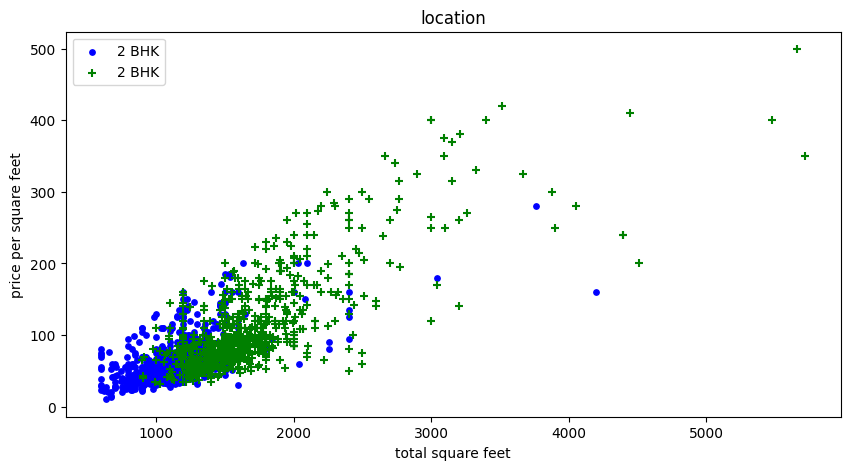

In [119]:
def plot_scatter(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    %matplotlib inline 
    matplotlib.rcParams["figure.figsize"] = (10,5)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 15)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'green', marker = '+', label = '2 BHK', s = 35)
    plt.xlabel('total square feet')
    plt.ylabel('price per square feet')
    plt.title('location')
    plt.legend()
    plt.show()
plot_scatter(df3, 'other')    

In [120]:
# removing flats whose price are greater than their (bhk-1) flats at a particular location
def remove_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk , bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : bhk_df.price_per_sqft.mean(),
                'std' : bhk_df.price_per_sqft.std(),
                'count' : bhk_df.shape[0]
            }
        for bhk , bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values) # we are noting down the row indexes here for dropping them 
    return df.drop(exclude_indices, axis = 0)
df4 = remove_outlier(df3)

In [121]:
df4.shape

(7054, 7)

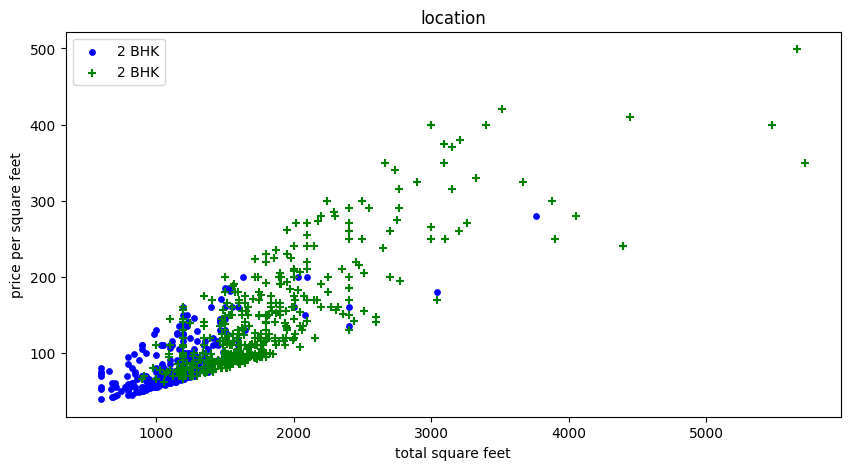

In [122]:
plot_scatter(df4, 'other')

(array([5.160e+02, 3.355e+03, 2.335e+03, 4.450e+02, 2.450e+02, 9.000e+01,
        4.700e+01, 1.500e+01, 3.000e+00, 3.000e+00]),
 array([ 1300.,  3570.,  5840.,  8110., 10380., 12650., 14920., 17190.,
        19460., 21730., 24000.]),
 <BarContainer object of 10 artists>)

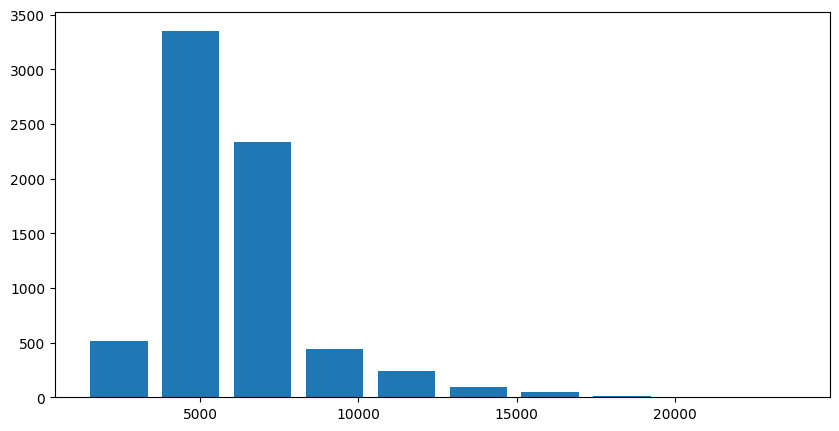

In [123]:
%matplotlib inline
plt.hist(df4.price_per_sqft, rwidth=0.8)

In [124]:
df4[df4.bath > df4.bhk+2]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
445,other,11338.0,9,1,1000.0,6,8819.897689
3547,Thanisandra,1806.0,6,2,116.0,3,6423.034330
8344,Chikkabanavar,2460.0,7,2,80.0,4,3252.032520


(array([4.700e+03, 1.672e+03, 4.360e+02, 1.420e+02, 7.100e+01, 2.700e+01,
        5.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

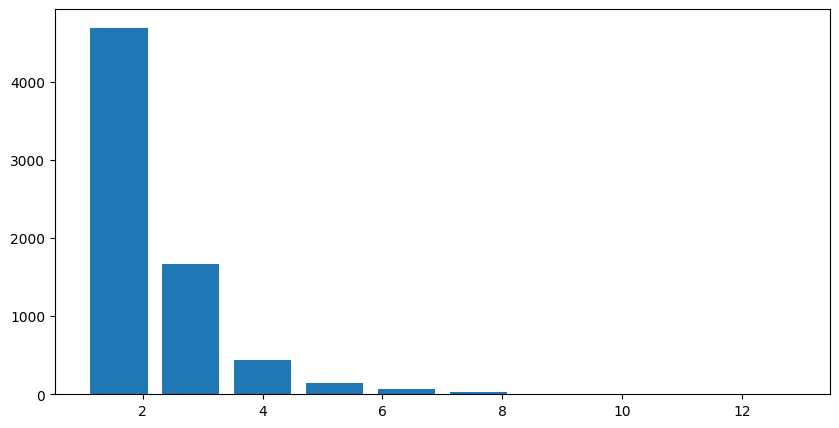

In [125]:
%matplotlib inline
plt.hist(df4.bath, rwidth=0.8)

In [126]:
df4 = df4[df4.bath <= df4.bhk+2]

In [127]:
df4

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,other,2770.0,4,2,290.0,3,10469.314079
3,other,600.0,1,0,38.0,1,6333.333333
6,other,1500.0,2,2,185.0,2,12333.333333
8,other,4395.0,3,2,240.0,3,5460.750853
9,other,845.0,2,1,55.0,2,6508.875740
...,...,...,...,...,...,...,...
9893,1st Block Jayanagar,1875.0,2,3,235.0,3,12533.333333
9894,1st Block Jayanagar,1200.0,2,0,130.0,3,10833.333333
9895,1st Block Jayanagar,1235.0,2,2,148.0,2,11983.805668
9896,1st Block Jayanagar,2750.0,4,0,413.0,4,15018.181818


(array([ 532.,    0.,    0., 2940.,    0.,    0., 2774.,    0.,    0.,
         805.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

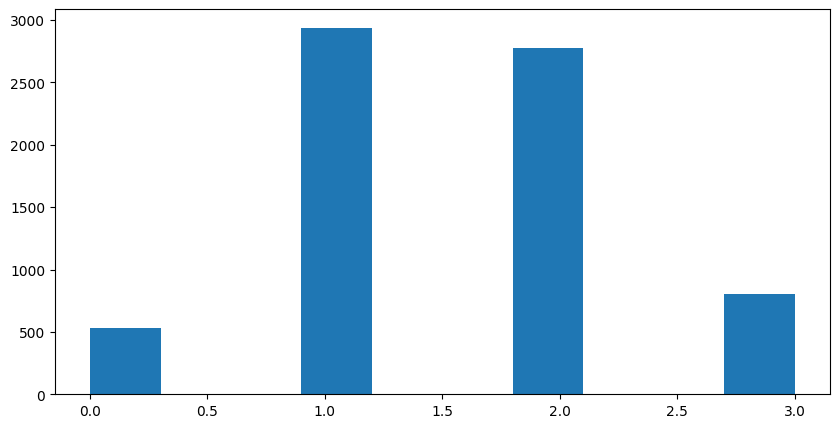

In [128]:
%matplotlib inline
plt.hist(df4.balcony, rwidth=1)

In [129]:
df4[df4.balcony > ((df4.bhk/2) + 1)]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
10,other,2511.0,3,3,205.0,3,8164.078057
19,other,1800.0,3,3,120.0,3,6666.666667
22,other,1870.0,3,3,110.0,3,5882.352941
36,other,1580.0,3,3,100.0,3,6329.113924
37,other,1415.0,3,3,78.0,3,5512.367491
...,...,...,...,...,...,...,...
9871,2nd Phase Judicial Layout,1681.0,3,3,69.0,3,4104.699584
9881,1st Phase JP Nagar,840.0,2,2,50.0,1,5952.380952
9882,1st Phase JP Nagar,1590.0,3,3,131.0,3,8238.993711
9886,1st Phase JP Nagar,2077.0,3,3,175.0,3,8425.613866


In [130]:
df4 = df4[df4.balcony <= ((df4.bhk/2) + 1)]
df4

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,other,2770.0,4,2,290.0,3,10469.314079
3,other,600.0,1,0,38.0,1,6333.333333
6,other,1500.0,2,2,185.0,2,12333.333333
8,other,4395.0,3,2,240.0,3,5460.750853
9,other,845.0,2,1,55.0,2,6508.875740
...,...,...,...,...,...,...,...
9892,1st Block Jayanagar,1630.0,3,2,194.0,3,11901.840491
9894,1st Block Jayanagar,1200.0,2,0,130.0,3,10833.333333
9895,1st Block Jayanagar,1235.0,2,2,148.0,2,11983.805668
9896,1st Block Jayanagar,2750.0,4,0,413.0,4,15018.181818


In [131]:
df4.drop(['price_per_sqft'], axis = 1)

,location,total_sqft,bath,balcony,price,bhk
0,other,2770.0,4,2,290.0,3
3,other,600.0,1,0,38.0,1
6,other,1500.0,2,2,185.0,2
8,other,4395.0,3,2,240.0,3
9,other,845.0,2,1,55.0,2
...,...,...,...,...,...,...
9892,1st Block Jayanagar,1630.0,3,2,194.0,3
9894,1st Block Jayanagar,1200.0,2,0,130.0,3
9895,1st Block Jayanagar,1235.0,2,2,148.0,2
9896,1st Block Jayanagar,2750.0,4,0,413.0,4


In [132]:
dummies = pd.get_dummies(df4.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9892,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9894,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9895,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9896,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
df4 = pd.concat([df4.drop(['location'], axis =1), dummies], axis = 1)

In [134]:
df4

,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2770.0,4,2,290.0,3,10469.314079,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,600.0,1,0,38.0,1,6333.333333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1500.0,2,2,185.0,2,12333.333333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,4395.0,3,2,240.0,3,5460.750853,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,845.0,2,1,55.0,2,6508.875740,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9892,1630.0,3,2,194.0,3,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9894,1200.0,2,0,130.0,3,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9895,1235.0,2,2,148.0,2,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9896,2750.0,4,0,413.0,4,15018.181818,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
df4.drop('other', axis =1, inplace = True)

In [136]:
df4

,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2770.0,4,2,290.0,3,10469.314079,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,600.0,1,0,38.0,1,6333.333333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1500.0,2,2,185.0,2,12333.333333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4395.0,3,2,240.0,3,5460.750853,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,845.0,2,1,55.0,2,6508.875740,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9892,1630.0,3,2,194.0,3,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9894,1200.0,2,0,130.0,3,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9895,1235.0,2,2,148.0,2,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9896,2750.0,4,0,413.0,4,15018.181818,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
df4 = df4.drop(['price_per_sqft', 'balcony'], axis =1)

In [138]:
df4

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2770.0,4,290.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,600.0,1,38.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1500.0,2,185.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4395.0,3,240.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,845.0,2,55.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9892,1630.0,3,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9894,1200.0,2,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9895,1235.0,2,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9896,2750.0,4,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
type(df4.total_sqft[0])

numpy.float64

In [140]:
X = df4.drop('price', axis =1)

In [141]:
y = df4.price

In [142]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25)

In [143]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8387834636973788

In [144]:
from sklearn.tree import DecisionTreeRegressor

In [145]:
from sklearn.model_selection import ShuffleSplit
c = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

In [146]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(), X, y, cv = c)

array([0.86659219, 0.86248261, 0.85758964, 0.84988408, 0.78580887,
       0.86125058, 0.85569907, 0.80520649, 0.8202848 , 0.85460643])

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


samples = {
    'LinearRegressor' : {
        'model' : LinearRegression(),
        'params' : {
            'positive' : [True, False]
        }
    },
    'lasso' : {
        'model' : Lasso(),
        'params' : {
            'alpha' : [1,2],
            'selection' : ['random','cyclic']
        }
    },
    'DecisionTreeRegressor' : {
        'model' : DecisionTreeRegressor(),
        'params' : {
            'splitter': ['best', 'random']
        }
    }
}

scores = []

for model_name, config in samples.items():
    gs= GridSearchCV(config['model'],config['params'], cv = c, return_train_score = False)
    
    gs.fit(X,y)
    
    scores.append({
        'model': model_name,
        'best_score' : gs.best_score_,
        'best_params' : gs.best_params_
    })

In [148]:
scores

[{'model': 'LinearRegressor',
  'best_score': 0.8419404756937532,
  'best_params': {'positive': False}},
 {'model': 'lasso',
  'best_score': 0.682634851272534,
  'best_params': {'alpha': 2, 'selection': 'cyclic'}},
 {'model': 'DecisionTreeRegressor',
  'best_score': 0.6342101201952998,
  'best_params': {'splitter': 'best'}}]

In [149]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=238)

In [150]:
np.where(X.columns == '2nd Phase Judicial Layout')[0][0]

5

In [151]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index>=0:
        x[loc_index] = 1
    return model.predict([x])[0] 
predict_price('Indira Nagar', 1875, 3, 3)

C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


237.38044583974596

In [152]:
df4

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2770.0,4,290.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,600.0,1,38.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1500.0,2,185.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4395.0,3,240.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,845.0,2,55.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9892,1630.0,3,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9894,1200.0,2,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9895,1235.0,2,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9896,2750.0,4,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
df[df.location == 'Indira Nagar']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
663,Built-up Area,Ready To Move,Indira Nagar,4 Bedroom,NaN,2200,4.0,2.0,200.0
1002,Super built-up Area,Ready To Move,Indira Nagar,2 BHK,NaN,1200,2.0,2.0,93.0
1128,Super built-up Area,Ready To Move,Indira Nagar,2 BHK,Aentsbe,1128,2.0,2.0,105.0
1774,Super built-up Area,Ready To Move,Indira Nagar,3 BHK,ToSky F,2800,3.0,1.0,330.0
2066,Super built-up Area,Ready To Move,Indira Nagar,3 BHK,MCtleas,1650,3.0,2.0,200.0
3249,Carpet Area,Ready To Move,Indira Nagar,3 BHK,Gonorir,1875,3.0,1.0,180.0
3260,Built-up Area,Ready To Move,Indira Nagar,2 BHK,VKvenas,1210,2.0,1.0,102.0
3308,Built-up Area,Ready To Move,Indira Nagar,2 BHK,Riousd,1224,2.0,2.0,105.0
3440,Plot Area,Ready To Move,Indira Nagar,6 Bedroom,NaN,2480,4.0,1.0,750.0
3486,Super built-up Area,Ready To Move,Indira Nagar,3 BHK,NaN,2070,3.0,2.0,225.0


In [154]:
import joblib

In [155]:
joblib.dump(model, 'prediction_model')

['prediction_model']

In [156]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [157]:
import pickle

In [159]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)